# CIS 5450 Homework 1: Data Wrangling and Cleaning (Fall 2024)
_Due: Wednesday, September 26th, 10:00 PM EST_

_Total Points: 100 (100 Autograded)_

Hello future data scientists and welcome to CIS 5450! In this homework, you will familiarize yourself with Pandas 🐼 and Polars! Both are cute animals and essential libraries for Data Science. This homework is focused on one of the most important tasks in Data Science, preparing datasets so that they can be analyzed, plotted, used for machine learning models, etc...

This homework will be broken into analyzing several datasets across four sections!

1. Working with [Amazon Prime Video Data](https://www.kaggle.com/datasets/victorsoeiro/amazon-prime-tv-shows-and-movies) to understand the details behind its movies

2. Working on merged/joined versions of the datasets (more on this later though).

4. Regex

3. Working with [Used Cars Dataset](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data) and Polars to see performance between Pandas, eager execution in Polars, and lazy execution in Polars.

**IMPORTANT NOTE: Before starting, you must click on the "Copy To Drive" option in the top bar. This is the master notebook so <u>you will not be able to save your changes without copying it </u>! Once you click on that, make sure you are working on that version of the notebook so that your work is saved**


Run the following 4 cells to setup the notebook

In [2]:
%set_env HW_ID=cis5450_fall24_HW1

env: HW_ID=cis5450_fall24_HW1


In [3]:
%%capture
!pip install penngrader-client

In [4]:
from penngrader.grader import *
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import datetime as dt
import requests
from lxml import html
import math
import re
import json
import os

In [5]:
!wget -nc https://storage.googleapis.com/penn-cis5450/credits.csv
!wget -nc https://storage.googleapis.com/penn-cis5450/titles.csv

--2024-09-19 19:19:30--  https://storage.googleapis.com/penn-cis5450/credits.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.207, 172.253.62.207, 142.251.163.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5983039 (5.7M) [text/csv]
Saving to: ‘credits.csv’

credits.csv         100%[===================>]   5.71M  --.-KB/s    in 0.06s   

2024-09-19 19:19:30 (97.2 MB/s) - ‘credits.csv’ saved [5983039/5983039]

--2024-09-19 19:19:30--  https://storage.googleapis.com/penn-cis5450/titles.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.207, 172.253.62.207, 142.251.163.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3885461 (3.7M) [text/csv]
Saving to: ‘titles.csv’

titles.csv          100%[===================>]   3.7

#What is Pandas?

<div class = "row">
<div class="column">
Apart from animals, Pandas is a Python library to aid with data manipulation/analysis. It is built with support from Numpy. Numpy is another Python package/library that provides efficient calculations for matrices and other math problems.
</div><div class="column">
<p class="d-flex" align = "center">
<img src = "https://thehill.com/sites/default/files/styles/article_full/public/panda_getty.jpg?itok=4ce_5sip" height= "200" align ="center"/>
<img src = "https://cff2.earth.com/uploads/2016/09/08101343/giant-panda-bear_1big_stock1.jpg" height= "200" align ="center"/>
</p>
</div>
</div>

Let's also get familiarized with the **PennGrader**. It was developed specifically for 545 by a previous TA, Leonardo Murri.
<br>

PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. Let's try it out! Fill in the cell below with your 8-digit Penn ID and then run the following cell to initialize the grader.

In [6]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY.
# IF NOT, THE AUTOGRADER WON'T KNOW WHO TO ASSIGN POINTS TO YOU IN OUR BACKEND
# YOUR PENN-ID GOES HERE AS AN INTEGER
STUDENT_ID = 86393681

# You should also update this to a unique "secret" just for this homework, to
# authenticate this is YOUR submission
SECRET = STUDENT_ID

Leave this cell as-is...

In [7]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Writing notebook-config.yaml


In [8]:
grader = PennGrader('notebook-config.yaml', "cis5450_fall24_HW1", STUDENT_ID, STUDENT_ID)

PennGrader initialized with Student ID: 86393681

Make sure this correct or we will not be able to store your grade


We will use scores from Penn Grader to determine your grade. You will still need to submit your notebook so we can check for cheating and plagarism. Do not cheat.

**Note:** If you run Penn Grader after the due date for any question, your assignment will be marked late, even if you already had full points for the question before the deadline. To remedy this, if you're going to run your notebook after the deadline, either do not run the grading cells, or reinitialize the grader with an empty or clearly fake ID such as <code>999999999999</code> (please use 10+ digits to be clearly a fake <code>STUDENT_ID</code>)

#Adding our data so that our code can find it

We can't be data scientists without data! We provided code for you to download the data (the "wget" cell from earlier). If you go to the view on the left and click files, you should see something similar to this image



#Part 1: Working with Amazon Prime Video Data [38 points]

In this part of the homework we will be working with a dataset focused on Amazon Prime Video Movie Data!

##1.0 Loading in Titles data (2 points)

Let's first load our dataset into a Pandas Dataframe. Use Pandas's <code>read_csv</code> functionality, which you can find documentation for here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

While reading documentation is hard at first, we **strongly encourage you** to get into the habit of doing this, since many times your questions will be answered directly by the documentation (ex: "why isn't my dataframe dropping duplicates" or "why didn't this dataframe update").

#### **TODO**
- Save the Credits dataframe to a variable named: <code>credits_df</code>
- Save the Titles dataframe to a variable named: <code>titles_df</code>

In [9]:
#TODO: Import your two files to pandas dataframes -- make sure the dataframes are named correctly!
import pandas as pd
credits_df = pd.read_csv('credits.csv')
titles_df = pd.read_csv('titles.csv')


Let's focus on the `titles_df` for now and see what the dataframe looks like. Display the first 10 rows of the dataframe in the cell below (take a look at the documentation to find how to do this!)

In [10]:
#TODO: Display the first 10 rows of `titles_df`
titles_df.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
5,tm160494,Stagecoach,MOVIE,A group of people traveling on a stagecoach fi...,1939,NaN,96,"['western', 'drama']",['US'],NaN,tt0031971,7.8,48149.0,11.786,7.7
6,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,444243.0,26.495,8.3
7,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,NaN,66,"['thriller', 'drama', 'crime']",['US'],NaN,tt0037638,7.3,17233.0,7.757,7.2
8,tm116781,My Man Godfrey,MOVIE,"Fifth Avenue socialite Irene Bullock needs a ""...",1936,NaN,95,"['comedy', 'romance', 'drama']",['US'],NaN,tt0028010,8.0,23532.0,8.633,7.6
9,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,NaN,57,"['crime', 'drama']",['US'],NaN,tt0026683,4.0,864.0,3.748,3.6


Another thing that is often times helpful to do is inspect the types of each column in a dataframe. Output the types of `titles_df` in this cell below.

In [11]:
# TODO: Display the datatypes in `titles_df`
titles_df.dtypes


,0
id,object
title,object
type,object
description,object
release_year,int64
age_certification,object
runtime,int64
genres,object
production_countries,object
seasons,float64


Save the types of the `type`, `release_year`, `runtime`, `seasons`, `imdb_id`, and `tmdb_score` columns to a series called `titles_df_types` (retaining the index names) and pass them into the autograder cell below.

In [12]:
# View the output here!
column_subset = ['type', 'release_year', 'runtime', 'seasons', 'imdb_id', 'tmdb_score']
titles_df_types = titles_df[column_subset].dtypes
titles_df_types

,0
type,object
release_year,int64
runtime,int64
seasons,float64
imdb_id,object
tmdb_score,float64


In [13]:
# TEST CASE: titles_df_types (2pt)
# [CIS 545 PennGrader Cell] - 2 points
grader.grade(test_case_id = 'titles_df_types', answer = titles_df_types)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.1 Cleaning up Titles data (4 points)

When you work with data, you'll have NaNs, duplicates or columns that don't give much insight into the data. There are different ways to deal with missing values (i.e. imputation, which you can read into on your own), but for now, let's drop some of these rows in `titles_df` to clean up our data. Note that there might be multiple ways to do each step. Also note that a lot of the columns in `titles_df` have all nulls. Thus, **ensure to drop the unnecessary columns before filtering out rows with nulls**


Refer to the documentation if you get stuck -- it's your best friend!

<br>

#### **TODO: 1.1**

- Make a new data frame `titles_cleaned_df`
- Keep only the following columns:
 `id`, `title`, `type`, `release_year`, `runtime`, `genres`, `production_countries`, `imdb_score`, `imdb_votes`, `tmdb_popularity`, `tmdb_score`.
- Drop rows that have NaNs in them.
Use the [info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) function to see the number of null rows in this DataFrame before this, and afterward to sense check that your operation is correct
- [Reset](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) the index and drop the `index` column which stores the original index prior to resetting the index. We recommend you print out the intermediate dataframe prior to this to see that the indices are not consecutive!
- Cast `title`, `type` to type `string`, and `imdb_votes` to type `int`.
- Save the result to `titles_cleaned_df`.


Note: The affected string columns should appear as string datatype and not object (you can check using df.dtypes). If it is not, we recommend checking up on this [documentation](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) to see how to successfully convert object into strings **(Hint: cast as 'string' and not str)**.


In [14]:
#TODO: Keep only the necessary columns
titles_cleaned_df = titles_df[['id', 'title', 'type', 'release_year', 'runtime', 'genres', 'production_countries', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']]

In [15]:
#TODO: Drop nulls
titles_cleaned_df.info()
titles_cleaned_df = titles_cleaned_df.dropna()
titles_cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   release_year          9871 non-null   int64  
 4   runtime               9871 non-null   int64  
 5   genres                9871 non-null   object 
 6   production_countries  9871 non-null   object 
 7   imdb_score            8850 non-null   float64
 8   imdb_votes            8840 non-null   float64
 9   tmdb_popularity       9324 non-null   float64
 10  tmdb_score            7789 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 848.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 7317 entries, 0 to 9864
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------  

In [16]:
#TODO: Reset and drop the index
titles_cleaned_df = titles_cleaned_df.reset_index(drop=True)

In [17]:
#TODO: Cast type
# Correctly casting and reassigning the columns
titles_cleaned_df['title'] = titles_cleaned_df['title'].astype('string')
titles_cleaned_df['type'] = titles_cleaned_df['type'].astype('string')
titles_cleaned_df['imdb_votes'] = titles_cleaned_df['imdb_votes'].astype('int')


print(titles_cleaned_df.dtypes)


id                              object
title                   string[python]
type                    string[python]
release_year                     int64
runtime                          int64
genres                          object
production_countries            object
imdb_score                     float64
imdb_votes                       int64
tmdb_popularity                float64
tmdb_score                     float64
dtype: object


In [18]:
# TEST CASE: titles_cleaned_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'titles_cleaned_df', answer = titles_cleaned_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.




##1.2 Data Wrangling with Titles Data (8 points)

Now, let's process the data in an appropriate format so that we can answer some queries more easily. Make sure to use `titles_cleaned_df` for this part.

**TODO: 1.2**

*  Create a column called `is_movie` that contains a value of **1** if the type of content is MOVIE and a value of **0** if not.
* Create the `genres_expanded` column to create individual rows for each genre of each movie. Hint: Make sure it is the correct type before doing this!
* Similar to before, create a `production_countries_expanded` column to create individual rows for each country where the movie was produced.
* Drop the redundant columns `type`, `genres`,  and `production_countries`, as well as all Na values, saving the result as `titles_final_df`. Make sure to reset and drop the index as well! (8 points)


Hint: See [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html), [explode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html), [json.loads](https://www.geeksforgeeks.org/json-loads-in-python/), `lambda` and [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) in Python documentation.

Note:
Feel free to reference this Geeks4Geeks [link](https://www.geeksforgeeks.org/python-convert-a-string-representation-of-list-into-list/) to better understand how to use the json.loads() function. You may not import ast or eval to do this.

Note:
We recommend printing out the intermediate steps and testing your logic on singular values and getting the correct answer, before applying it to the entire dataframe!

Note:
Include rows with the type SHOW, too.


In [19]:
# TODO
import numpy as np

titles_cleaned_df['is_movie'] = np.where(titles_cleaned_df['type']=='MOVIE',1,0)


titles_cleaned_df['genres_expanded'] = titles_cleaned_df['genres'].apply(lambda x : x.split("'")[1:-1:2])
# titles_cleaned_df['genres_expanded'] = titles_cleaned_df['genres']
titles_cleaned_df = titles_cleaned_df.explode('genres_expanded')


# titles_cleaned_df['production_countries_expanded'] = titles_cleaned_df['production_countries'].str.strip("[]").str.replace("'", "").str.split(", ")
titles_cleaned_df['production_countries_expanded'] = titles_cleaned_df['production_countries'].apply(lambda x : json.loads(x.replace('\'', '"')))
titles_cleaned_df = titles_cleaned_df.explode('production_countries_expanded')

titles_final_df = titles_cleaned_df.drop(columns=['type', 'genres', 'production_countries'])
titles_final_df = titles_final_df.dropna()
titles_final_df = titles_final_df.reset_index(drop=True)
titles_final_df




,id,title,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,is_movie,genres_expanded,production_countries_expanded
0,ts20945,The Three Stooges,1934,19,8.6,1092,15.424,7.6,0,comedy,US
1,ts20945,The Three Stooges,1934,19,8.6,1092,15.424,7.6,0,family,US
2,ts20945,The Three Stooges,1934,19,8.6,1092,15.424,7.6,0,animation,US
3,ts20945,The Three Stooges,1934,19,8.6,1092,15.424,7.6,0,action,US
4,ts20945,The Three Stooges,1934,19,8.6,1092,15.424,7.6,0,fantasy,US
...,...,...,...,...,...,...,...,...,...,...,...
21306,tm616953,Ammaa Ki Boli,2021,117,7.3,1335,2.382,1.0,1,drama,IN
21307,tm1098070,Girls' Night In,2021,91,2.8,28,1.306,7.0,1,comedy,US
21308,tm1098070,Girls' Night In,2021,91,2.8,28,1.306,7.0,1,drama,US
21309,tm1019060,Anbirkiniyal,2021,118,6.8,361,2.191,7.0,1,thriller,IN


In [20]:
# TEST CASE: titles_final_df (8pt)
# [CIS 545 PennGrader Cell] - 8 points
grader.grade(test_case_id = 'titles_final_df', answer = titles_final_df)

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.3 Compute the Top Performing Genres

###1.3.1 Compute the Best Genres By IMDb and TMDb Score (6 points)

In this section we will compute the top performing genres, and will use both data from the Internet Movie Database (IMDb) and The Movie Database (TMDb) to do so. We will use `titles_final_df` in this section.


**TODO: 1.3.1**
* Use `groupby()` function
* Create a dataframe `genres` from `titles_final_df` with only the columns `genres_expanded`, `tmdb_popularity`, `imdb_score` and `tmdb_score`.
* Filter `genres` to only keep those movies with `tmdb_popularity` greater than 2.0.
* Create a dataframe `genres_imdb_df` that contains the average `imdb_score` for each `genre_expanded`. Make sure to keep the resultant `genres_expanded` and `imdb_score` columns
* Sort this in descending order, keeping only the top 10 values
* Create a column called `score` that is the average score rounded to two decimal places
* Reset the index and drop the `index` column
* Have only `score` and `genres_expanded` as part of `genres_tmdb_df`
* Do the same steps for creating `genres_imdb_df` to create `genres_tmdb_df` with `tmdb_score` instead!



In [21]:
#TODO: Create genres
genres_df = titles_final_df[['genres_expanded', 'tmdb_popularity', 'imdb_score', 'tmdb_score']]
genres_df = genres_df[genres_df['tmdb_popularity'] > 2.0]


In [22]:
#TODO: Create genres_imdb_df
genres_imdb_df = genres_df.groupby('genres_expanded')['imdb_score'].mean()
genres_imdb_df.sort_values(ascending=False, inplace=True)
genres_imdb_df = genres_imdb_df.head(10)
# genres_imdb_df is now a Series. Convert it back to a DataFrame and rename the column
genres_imdb_df = genres_imdb_df.to_frame(name='imdb_score') # Convert to DataFrame and name the column 'imdb_score'
genres_imdb_df['score'] = genres_imdb_df['imdb_score'].round(2)
genres_imdb_df = genres_imdb_df.reset_index()
genres_imdb_df = genres_imdb_df.drop(columns=['imdb_score'])
genres_imdb_df

,genres_expanded,score
0,documentation,6.99
1,history,6.77
2,reality,6.73
3,war,6.66
4,sport,6.44
5,animation,6.43
6,music,6.40
7,european,6.37
8,drama,6.30
9,romance,6.21


In [23]:
#TODO: Create genres_tmdb_df
genres_tmdb_df = genres_df.groupby('genres_expanded')['tmdb_score'].mean()
genres_tmdb_df.sort_values(ascending=False, inplace=True)
genres_tmdb_df = genres_tmdb_df.head(10)
genres_tmdb_df = genres_tmdb_df.to_frame(name='tmdb_score')
genres_tmdb_df['score'] = genres_tmdb_df['tmdb_score'].round(2)
genres_tmdb_df = genres_tmdb_df.reset_index()
genres_tmdb_df = genres_tmdb_df.drop(columns=['tmdb_score'])
genres_tmdb_df


,genres_expanded,score
0,animation,7.00
1,reality,6.84
2,documentation,6.80
3,history,6.66
4,family,6.50
5,war,6.50
6,sport,6.44
7,music,6.39
8,european,6.35
9,drama,6.28


In [24]:
# TEST CASE: genres_df (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'genres_df', answer = (genres_imdb_df, genres_tmdb_df))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###1.3.2 Compute the Percentage Difference Between Genres (6 points)

In this section we will compute the differences in results between `genres_imdb_df` and `genres_tmdb_df`.

**TODO: 1.3.2**
*   Merge `genres_imdb_df` and `genres_tmdb_df` on `genres_expanded` to create `merged_df`.
* Rename the `score` columns to `score_imdb` and `score_tmdb` respectively
* Create a column `difference` in `merged_df` that is defined as the absolute value of the percentage difference between `score_imdb` and `score_tmdb`. Hint: Check out the [abs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.abs.html/) function for help with this!
Use the following formula for this:
\begin{align}
difference = abs(\frac{scoreimdb - scoretmdb}{scoreimdb})*100
\end{align}
* Make sure do not use use Python iteration (e.g., `for` loop, `while` loop).
* Sort `merged_df` in descending order by `difference`
* Reset the index and drop the index column
* `merged_df` should have `score_imdb`, `genres_expanded`, `score_tmdb`, and `difference`





In [25]:
# TODO

merged_df = pd.merge(genres_imdb_df, genres_tmdb_df, on='genres_expanded')
merged_df= merged_df.rename(columns={'score_x': 'score_imdb', 'score_y': 'score_tmdb'})
merged_df ['difference'] = abs((merged_df['score_imdb'] - merged_df['score_tmdb']) / merged_df['score_imdb']) * 100
merged_df = merged_df.sort_values(by='difference', ascending=False)
merged_df = merged_df.reset_index(drop=True)
merged_df


,genres_expanded,score_imdb,score_tmdb,difference
0,animation,6.43,7.00,8.864697
1,documentation,6.99,6.80,2.718169
2,war,6.66,6.50,2.402402
3,reality,6.73,6.84,1.634473
4,history,6.77,6.66,1.624815
5,drama,6.30,6.28,0.317460
6,european,6.37,6.35,0.313972
7,music,6.40,6.39,0.156250
8,sport,6.44,6.44,0.000000


In [26]:
# TEST CASE: merged_df (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'merged_df', answer = merged_df)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.4 Finding Movie Variation By Decade

In this section we will compute the performance of movies by decade. We will first use `titles_final_df` to create `titles_intermediate_df` containing only unique titles that will be used throughout this section.

**TODO: 1.4**

*   Drop `genres_expanded` and `production_countries_expanded` to create `titles_intermediate_df`
*   Drop duplicate rows
*   Create a column `decade` that represents the decade the movie has been released. For example, if `release_year` is 1994, the `decade` should return 1990.


In [27]:
#TODO: Create titles_intermediate_df
titles_intermediate_df = titles_final_df.drop(columns=['genres_expanded', 'production_countries_expanded'])
titles_intermediate_df.drop_duplicates(inplace=True)
titles_intermediate_df['decade'] = (titles_intermediate_df['release_year'] // 10) * 10
titles_intermediate_df



,id,title,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,is_movie,decade
0,ts20945,The Three Stooges,1934,19,8.6,1092,15.424,7.6,0,1930
6,tm19248,The General,1926,78,8.2,89766,8.647,8.0,1,1920
12,tm82253,The Best Years of Our Lives,1946,171,8.1,63026,8.435,7.8,1,1940
15,tm83884,His Girl Friday,1940,92,7.8,57835,11.270,7.4,1,1940
18,tm56584,In a Lonely Place,1950,94,7.9,30924,8.273,7.6,1,1950
...,...,...,...,...,...,...,...,...,...,...
21301,tm1062990,Chloe's Mountain,2021,107,4.1,89,2.769,5.0,1,2020
21303,tm515444,No Witnesses,2021,101,3.1,94,2.163,4.8,1,2020
21305,tm616953,Ammaa Ki Boli,2021,117,7.3,1335,2.382,1.0,1,2020
21307,tm1098070,Girls' Night In,2021,91,2.8,28,1.306,7.0,1,2020


###1.4.1 Compute Bottom Movie Decades  (6 points)

**TODO: 1.4.1**

*   See the `groupby()` function.
*   Create a dataframe `bottom_titles_df` with the percentage of titles that are movies for each decade. For example, if we have a total of 100 titles in the 1990's, 20 of them are movies, then in the `decade` 1990, we should see 20.0 in the `Percentage` column
* Reset the index and drop the column
*   Return the five lowest decades by percentage, with columns `decade` and `Percentage`
* Do not round your answer in the final `Percentage` column

In [28]:
#TODO: Create bottom_movies_df
bottom_titles_df = titles_intermediate_df.groupby('decade')['is_movie'].mean() * 100
bottom_titles_df = bottom_titles_df.reset_index()
bottom_titles_df.sort_values(by = 'is_movie',ascending=True, inplace = True)
bottom_titles_df.rename(columns={'is_movie': 'Percentage'}, inplace=True)
bottom_titles_df = bottom_titles_df
bottom_titles_df.reset_index(drop=True, inplace=True)
bottom_titles_df=bottom_titles_df.head(5)
bottom_titles_df


,decade,Percentage
0,2020,80.671141
1,2000,84.302964
2,2010,85.295017
3,1990,87.914692
4,1980,92.048930


In [29]:
# TEST CASE: bottom_titles_df (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'bottom_titles_df', answer = bottom_titles_df)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###1.4.2 Greatest Shift in Average Runtime  (6 points)

We now will calculate the greatest shift in average runtime between decades as a percentage. Use `titles_intermediate_df` in this question.

**TODO: 1.4.2**

*   Create a dataframe `average_runtime_df` with the percentage change of average runtime for each decade (with regard to the previous decade)
*   Sort this by highest `percentage_shift` first with columns `decade`, `runtime` and `percentage_shift`. Make sure to drop nulls and reset index after!

Please use the following formula to calculate the percentage shift (for the Current Decade):


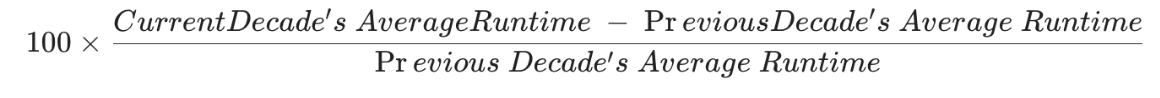

In [30]:
#TODO: Create average_runtime_df
average_runtime_df = titles_intermediate_df
average_runtime_df = average_runtime_df.groupby('decade')['runtime'].mean()
average_runtime_df = average_runtime_df.reset_index()
average_runtime_df.columns = ['decade', 'runtime']



# Calculate the percentage shift in runtime
average_runtime_df['percentage_shift'] = average_runtime_df['runtime'].pct_change()*100


In [31]:
# Sort the DataFrame by percentage_shift in descending order
average_runtime_df.sort_values(ascending=False, by='percentage_shift',inplace =True)




# Reset the index for the result DataFrame
average_runtime_df.dropna(inplace = True)
average_runtime_df = average_runtime_df.reset_index(drop =True)
average_runtime_df


,decade,runtime,percentage_shift
0,1960,94.082126,13.956570
1,1940,75.875740,8.833848
2,1950,82.559633,8.808999
3,1920,87.543860,3.724952
4,1970,96.424437,2.489646
5,2020,90.311409,0.920564
6,1980,95.385321,-1.077648
7,1990,94.111374,-1.335579
8,2010,89.487618,-2.292511
9,2000,91.587267,-2.682043


In [32]:
# TEST CASE: average_runtime_df (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'average_runtime_df', answer = average_runtime_df)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#Part 2: Combining the data [32 points]

When you become a full time data scientist, a lot of times, data will be spread out across multiple files/tables. The way to combine these tables is through join/merge operations. If you're familiar with SQL, this will be very familiar to you. If not, don't worry. I believe in you!

To start, here's a nice diagram which shows you the different types of joins


<p align = "center">
<img src = "https://i.stack.imgur.com/hMKKt.jpg" width= "600" align ="center"/>
</p>

A clarifying point: The two venn diagrams with the "(if Null)" are also called Left Outer Join and Right Outer Join

##2.1 TV Shows and Countries



#### 2.1.1 IMDB votes per country (4 points)


<br>

##### TODO: 2.1.1

- Using `titles_final_df`, create a new dataframe called `new_titles_final_df` which removes the `genres_expanded` column and drops duplicates.
- Next, create `intermediate_df` which only contains movies with greater than 10,000 IMDB votes
- Add a column to `intermediate_df` called `count` that is a 1 if the IMDB score is >= 6.
- Return a dataframe called `country_votes_df` counting the number of films with IMDB scores of at least 6 for each country. There should be two columns: `country` and `count`. Return this df in sorted order by count in ascending order and country in alphabetically descending order.  

**Note:** You may receive a warning message, which will not affect your output or your score.

**Note:** People often lose 2 points because their result does not reflect the requirement of this line of instruction:
Next, create intermediate_df which only contains movies with greater than 10,000 IMDB votes


In [33]:
# TODO
new_titles_final_df = titles_final_df.drop(columns = 'genres_expanded')
new_titles_final_df = new_titles_final_df.drop_duplicates()
intermediate_df = new_titles_final_df[(new_titles_final_df['is_movie']==1) & (new_titles_final_df['imdb_votes'] > 10000)]
intermediate_df['count'] = np.where(intermediate_df['imdb_score']>=6,1,0)
country_votes_df = intermediate_df.groupby('production_countries_expanded')['count'].sum()
country_votes_df = country_votes_df.reset_index()
country_votes_df = country_votes_df.sort_values(by = ['count','production_countries_expanded'],ascending = [True,False])
country_votes_df.columns = ['country','count']
country_votes_df = country_votes_df.reset_index(drop = True)


# new_titles_final_df

<ipython-input-33-046cb1c42f78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intermediate_df['count'] = np.where(intermediate_df['imdb_score']>=6,1,0)


In [34]:
# TEST CASE: country_votes_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'country_votes_df', answer = country_votes_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.1.2 Most Popular TV Show Actors (4 points)


TODO: Create an intermediate dataframe called `shows_df`, assuming all non-movies are TV shows, containing shows with at least 2000 votes.


*  Merge `credits_df` with `shows_df` to obtain the number of IMDB votes each actor has received from all the shows they have been in, only keeping the records that appear in both dataframes.
*  Group by `name`, and return a dataframe containing the `name` column and the `imdb_votes` column.

The result should be in dataframe `top_actors_df` sorted by decreasing votes.

**Note:** Use `new_titles_final_df` to create an intermediate dataframe called `shows_df`. Also ensure that we are looking for Most Popular TV Show **Actors**.







In [35]:
# TODO
shows_df = new_titles_final_df[(new_titles_final_df['is_movie']==0) & (new_titles_final_df['imdb_votes'] >= 2000)]
merged_df = pd.merge(shows_df,credits_df,on = 'id', how = 'inner')
merged_df = merged_df.loc[merged_df['role'] == 'ACTOR'] # dropping rows where role is not ACTOR
top_actors_df = merged_df.groupby('name')['imdb_votes'].sum()
del merged_df
top_actors_df = top_actors_df.reset_index()
top_actors_df = top_actors_df.sort_values(by = 'imdb_votes',ascending = False)
top_actors_df = top_actors_df.reset_index(drop = True)
top_actors_df


,name,imdb_votes
0,Alyson Hannigan,804863
1,Michael C. Hall,791919
2,Jennifer Carpenter,791919
3,C.S. Lee,711566
4,Desmond Harrington,711566
...,...,...
2653,Pom Boyd,2014
2654,Liz Fitzgibbon,2014
2655,Brian Gleeson,2014
2656,Pat Shortt,2014


In [36]:
# TEST CASE: top_actors_df (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'top_actors_df', answer = top_actors_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##2.2 Exploring Acting

Let's now looking deeper to the different types of actors and their characteristics

#### 2.2.1 Comedy Actors (5 points)

TODO:

- Create a new dataframe `comedy_actors_df` that filters `titles_final_df` to only contain shows in the comedy genre
- Merge `comedy_actors_df` again with `actor_credits_df` to obtain the actors in comedy shows
- Calculate the average `imdb_votes` of each actor,
- Create a new column called `ranking` which assigns the label of "low" if an actor averages less than 10,000 votes, "med" if an actor averages between 10,000 and 100,000 votes, and "high" if an actor averages greater than 100,000 votes.
- `comedy_actors_df` should have columns `person_id`, `name`, and `imdb_votes`

Note: Ranking should be in the output dataframe `comedy_actors_df` and is calculated based on `imdb_votes` (NOT `tmdb_popularity`). It is okay if certain intermediate calculated columns are not included in the final output. The value of `imdb_votes` in the final output should be the average of the `imdb_votes` that each actor had received.

Note: While `name` may be duplicated, `person_id` is the unique identifier for each actor.


In [37]:
# # TOD

comedy_actors_df = titles_final_df[(titles_final_df['genres_expanded'] == 'comedy') & (titles_final_df['is_movie']==0)]
comedy_actors_df = pd.merge(comedy_actors_df, credits_df, on='id', how='inner')
comedy_actors_df= comedy_actors_df.loc[comedy_actors_df['role']=='ACTOR']

comedy_actors_df = comedy_actors_df.groupby(['person_id', 'name'], as_index=False).agg({'imdb_votes': 'mean'})

comedy_actors_df['ranking'] = np.where(comedy_actors_df['imdb_votes'] < 10000, 'low',np.where(comedy_actors_df['imdb_votes'] < 100000, 'med', 'high'))

comedy_actors_df = comedy_actors_df[['person_id', 'name', 'imdb_votes', 'ranking']]
comedy_actors_df = comedy_actors_df.reset_index(drop = True)
comedy_actors_df


,person_id,name,imdb_votes,ranking
0,7,Tamsin Greig,17634.00,med
1,10,Darren Boyd,7332.00,low
2,48,Tom Kane,3244.00,low
3,61,Ryan Hansen,30771.00,med
4,121,Mamiko Noto,8939.75,low
...,...,...,...,...
2256,2256489,Elisabeth Hadley,350.00,low
2257,2276175,Miguel Pérez Gil,509.00,low
2258,2286488,Sofía Morandi,386.00,low
2259,2293359,Wei Xiao,460.00,low


In [38]:
# TEST CASE: comedy_actors_df (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'comedy_actors_df', answer = comedy_actors_df)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


####2.2.2 Finding Highest Ranked Actors  (6 points)

We want to find the actors who have received the "high" ranking for both the comedy and drama genres. Use the same logic as the previous question to obtain the highest ranked actors for the drama category, and find the actors that appear as highly ranked for both genres. Return this as an alphabetically ranked list called `highest_ranked` with actor names ensuring that there are no duplicates.

In [39]:
# TODO
highest_ranked_drama = titles_final_df[(titles_final_df['genres_expanded'] == 'drama')&(titles_final_df['is_movie']==0)]
highest_ranked_comedy = titles_final_df[(titles_final_df['genres_expanded'] == 'comedy')&(titles_final_df['is_movie']==0)]


highest_ranked_drama = pd.merge(highest_ranked_drama, credits_df, on='id', how='inner')
highest_ranked_comedy = pd.merge(highest_ranked_comedy, credits_df, on='id', how='inner')

highest_ranked_drama = highest_ranked_drama.loc[highest_ranked_drama['role']=='ACTOR']
highest_ranked_comedy = highest_ranked_comedy.loc[highest_ranked_comedy['role']=='ACTOR']

highest_ranked_drama = highest_ranked_drama.groupby(['person_id', 'name'], as_index=False).agg({'imdb_votes': 'mean'})
highest_ranked_comedy = highest_ranked_comedy.groupby(['person_id', 'name'], as_index=False).agg({'imdb_votes': 'mean'})

highest_ranked_drama['ranking'] = np.where(highest_ranked_drama['imdb_votes'] < 10000, 'low',np.where(highest_ranked_drama['imdb_votes'] < 100000, 'med', 'high'))
highest_ranked_comedy['ranking'] = np.where(highest_ranked_comedy['imdb_votes'] < 10000, 'low',np.where(highest_ranked_comedy['imdb_votes'] < 100000, 'med', 'high'))

highest_ranked_drama = highest_ranked_drama.loc[highest_ranked_drama['ranking']=='high']
highest_ranked_comedy = highest_ranked_comedy.loc[highest_ranked_comedy['ranking']=='high']

highest_ranked_drama = highest_ranked_drama[['person_id', 'name', 'imdb_votes', 'ranking']]
highest_ranked_comedy = highest_ranked_comedy[['person_id', 'name', 'imdb_votes', 'ranking']]




highest_ranked = pd.merge(highest_ranked_drama, highest_ranked_comedy, on='person_id', how='inner')
highest_ranked = highest_ranked.drop_duplicates(subset='person_id').dropna()




highest_ranked = highest_ranked.sort_values(by = 'name_x')
highest_ranked = highest_ranked['name_x'].tolist()
# highest_ranked['name_x'].reset_index()

# highest_ranked = highest_ranked['name_x']
# highest_ranked = highest_ranked.reset_index(drop = True)

highest_ranked


# error i dont understand



['Alex Borstein',
 'Alyson Hannigan',
 'Amanda Schull',
 'Antony Starr',
 'Bailey De Young',
 'Bill Paterson',
 'Bob Odenkirk',
 'Brett Gelman',
 'Caroline Aaron',
 'Chace Crawford',
 'Charlyne Yi',
 'Claudia Doumit',
 'Colby Minifie',
 'Dave Franco',
 'Dominique McElligott',
 'Donald Faison',
 'Dulé Hill',
 "Dylan O'Brien",
 'Dylan Sprayberry',
 'Eliza Coupe',
 'Erin Moriarty',
 'Gabriel Macht',
 'Giancarlo Esposito',
 'Holland Roden',
 'Hugh Dennis',
 'Hugh Laurie',
 'JR Bourne',
 'Jack Quaid',
 'Jenny Rainsford',
 'Jensen Ackles',
 'Jesse Spencer',
 'Jessie T. Usher',
 'John C. McGinley',
 'Jonathan Banks',
 'Karen Fukuhara',
 'Karl Urban',
 'Katherine Heigl',
 'Kevin Pollak',
 'Laurie Holden',
 'Laz Alonso',
 'Linden Ashby',
 'Marin Hinkle',
 'Matilda Szydagis',
 'Melissa Ponzio',
 'Michael Mando',
 'Michael Mosley',
 'Michael Zegen',
 'Nathan Mitchell',
 'Nunzio Pascale',
 'Odette Annable',
 'Olivia Colman',
 'Omar Epps',
 'Patrick Fabian',
 'Peter Jacobson',
 'Phoebe Waller-Bridg

In [40]:
# TEST CASE: highest_ranked (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'highest_ranked', answer = highest_ranked)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##2.3 Oscars: Finding the Best of Each Category!

Let's now look at those who did the best in their profession, as well as those who improved well

#### 2.3.1 Finding the Best of Each Profession (7 points)

Use `titles_intermediate_df` and `credits_df` in this question and merge them together on `id`. Name it `combine_df` and use it further. For each profession in `credits_df` (Actor and Director), do the following:

- Find the average `imdb_score` for each `name`. (make sure there are at least 5 appearances for each person)
- Locate the person with the highest imdb_score for that category. Use `.iloc` and `sort_values` to help with this.
- Avg IMDB_score should be for each profession, not overall, for each individual.


Output should be `best_role_names` with the name of the best actor and then best director in a list. The second output is `best_role_values`, which would give their respective score. For example, `best_role_names = [Martin Scorsese, Leonardo DiCaprio]` and `best_role_values = [8.3, 8.1]`.


Important: Please keep all titles when performing the average! Do not filter for movies.






In [41]:
import pandas as pd

# Step 1: Merge titles_intermediate_df and credits_df on 'id' to create combine_df
combine_df = pd.merge(titles_intermediate_df, credits_df, on='id')

# Step 2: Filter for actors
actors_df = combine_df[combine_df['role'] == 'ACTOR']

# Step 3: Group by 'name' for actors, calculate appearances and average imdb_score
actors_grouped = actors_df.groupby('name').agg(
    appearances=('id', 'size'),
    avg_imdb_score=('imdb_score', 'mean')
).reset_index()

# Step 4: Filter actors with at least 5 appearances
actors_grouped = actors_grouped[actors_grouped['appearances'] >= 5]

# Step 5: Sort by avg_imdb_score and find the best actor
best_actor = actors_grouped.sort_values(by='avg_imdb_score', ascending=False).iloc[0]

# Step 6: Repeat the same process for directors
directors_df = combine_df[combine_df['role'] == 'DIRECTOR']

directors_grouped = directors_df.groupby('name').agg(
    appearances=('id', 'size'),
    avg_imdb_score=('imdb_score', 'mean')
).reset_index()

directors_grouped = directors_grouped[directors_grouped['appearances'] >= 5]
best_director = directors_grouped.sort_values(by='avg_imdb_score', ascending=False).iloc[0]

# Step 7: Extract the names and scores of the best actor and best director
best_role_names = [best_director['name'], best_actor['name']]
best_role_values = [round(best_director['avg_imdb_score'], 2), round(best_actor['avg_imdb_score'], 2)]

# Output the results
print("Best Role Names:", best_role_names)
print("Best Role Values:", best_role_values)


Best Role Names: ['Hideaki Anno', 'Hiroaki Hirata']
Best Role Values: [7.5, 7.88]


In [42]:
# TEST CASE: best_roles (7pt)
# [CIS 545 PennGrader Cell] - 7 points
grader.grade(test_case_id = 'best_roles', answer = (best_role_names, best_role_values))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.3.2 Most Improved Individuals (6 points)
Use `titles_intermediate_df` and `credits_df` in this question. We are now interested in which individuals (both actors and directors) improved the most between the 2000s and 2010s.


TODO:
- Find the average `imdb_score` for individuals who have appeared in at least 2 movies in both the 2000s and 2010s and find the difference between them.
-  Return the 5 individuals with the highest increase in `imdb_score`. (most improvement between the 2010s and 2000s) as `best_individuals`. For example, `best_individuals = ['Gerard Butler', 'Shahid Kapoor', 'Jennifer Lawrence', 'Leonardo DiCaprio', 'Meryl Streep']`

Note: To calculate largest difference in IMDB score, we find average scores for movies they were in during the 2000s and separately an average score for movies they were in during the 2010s.


In [43]:
# TODO
imp_ind = pd.merge(titles_intermediate_df, credits_df, on='id')
imp_ind= imp_ind[(imp_ind['decade']>=2000) & (imp_ind['decade']<=2010)]
imp_ind_twok = imp_ind[imp_ind['decade']==2000]
imp_ind_twok = imp_ind_twok.groupby('name').agg(
    appearances=('id', 'size'),avg_imdb_score=('imdb_score', 'mean'))
imp_ind_twok = imp_ind_twok[imp_ind_twok['appearances'] >= 2].reset_index()
imp_ind_twoten = imp_ind[imp_ind['decade']==2010]
imp_ind_twoten = imp_ind_twoten.groupby('name').agg(
    appearances=('id', 'size'),avg_imdb_score=('imdb_score', 'mean'))
imp_ind_twoten = imp_ind_twoten[imp_ind_twoten['appearances'] >= 2].reset_index()

highfive_df = pd.merge(imp_ind_twok, imp_ind_twoten, on='name')
highfive_df['diff'] = highfive_df['avg_imdb_score_y'] - highfive_df['avg_imdb_score_x']
highfive_df = highfive_df.sort_values(by='diff', ascending=False)
best_individuals = highfive_df['name'].head(5).tolist()
best_individuals

['Akshay Kumar', 'Mackenzie Crook', 'Jon Voight', 'Iggy Pop', 'Erin Karpluk']

In [44]:
# TEST CASE: best_individuals (6pt)
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'best_individuals', answer = best_individuals)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#Part 3: Regex [15 points]


Regular expressions (regex) stand as one of the most powerful tools in a data scientist's arsenal, allowing efficient searching, matching, and manipulation of text data. We will be harnessing the power of regex to explore our movie titles data.

Here is helpful documentation for you as you're working through this part of the homework: https://www.w3schools.com/python/python_regex.asp

## Part 3.1: Basic Pattern Matching

#### Part 3.1.1: Movies that start with 'A' and end with 'n' (3 points)

To start with, let's find all the movies that start with the letter 'A' and end with the letter 'n', for example *Alien*.

**TODO: 3.1.1**
- Fill out the `pattern` variable with the appropriate regex pattern.
- Using `titles_cleaned_df`, create the dataframe `a_n_titles_df` that only contains movies starting with 'A' and ending with 'n'. Consider the fact that movie names are capitalized.
- Drop duplicate titles and reset index.

HINT: use `str.contains()`: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html

Final schema should be: `id title type release_year runtime genres production_countries imdb_score imdb_votes tmdb_popularity tmdb_score is_movie genres_expanded production_countries_expanded`

In [45]:
# TODO
pattern =r'^A.*n$'
a_n_titles_df = titles_cleaned_df[titles_cleaned_df['title'].str.contains(pattern)]
a_n_titles_df=a_n_titles_df.drop_duplicates(subset='title')
a_n_titles_df.reset_index(drop=True,inplace=True)
a_n_titles_df

,id,title,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,is_movie,genres_expanded,production_countries_expanded
0,tm158,A Song Is Born,MOVIE,1948,113,"['music', 'action', 'comedy', 'romance']",['US'],6.9,2489,3.459000,6.5,1,music,US
1,tm91499,Angel and the Badman,MOVIE,1947,100,"['western', 'romance']",['US'],6.8,5913,5.926000,6.5,1,western,US
2,tm1345,Abilene Town,MOVIE,1946,89,"['western', 'romance', 'action']",['US'],6.2,1000,2.833000,5.3,1,western,US
3,tm68948,All Over Town,MOVIE,1937,63,['comedy'],['US'],5.1,178,1.289000,7.2,1,comedy,US
4,tm1152,A Lawman Is Born,MOVIE,1937,58,['western'],['US'],5.8,86,1.400000,3.0,1,western,US
5,tm2784,Attack: The Battle for New Britain,MOVIE,1944,54,"['war', 'documentation', 'action']",['US'],6.3,95,1.241000,6.0,1,war,US
6,tm45967,A Bomb Was Stolen,MOVIE,1961,72,"['scifi', 'comedy', 'fantasy']",['RO'],6.6,257,1.012000,5.4,1,scifi,RO
7,tm151066,Ator IV: The Hobgoblin,MOVIE,1990,94,"['fantasy', 'european']",['IT'],2.7,822,3.131000,3.2,1,fantasy,IT
8,tm121872,A League of Their Own,MOVIE,1992,128,"['drama', 'comedy', 'sport', 'family']",['US'],7.3,104030,12.011000,7.2,1,drama,US
9,tm58094,Armageddon,MOVIE,1998,151,"['thriller', 'scifi', 'action']",['US'],6.7,419102,53.447000,6.8,1,thriller,US


In [46]:
# Run this cell to submit to PennGrader!

# [CIS 545 PennGrader Cell] - 3 points
grader.grade(test_case_id = 'a_n_titles_df', answer = a_n_titles_df)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### Part 3.1.2: Title Character Classes (4 points)
Some movie titles contain characters outside of our standard alphabet (e.g. accents, apostrophes, dashes, etc.). Let's count the number of these movies by release year.

**TODO: 3.1.2**
- Fill out the `pattern` variable with the appropriate regex pattern.
- Using `titles_cleaned_df`, filter for titles containing characters other than `A-Z` (case insensitive) as well as spaces. Save the result in an intermediate dataframe.
- Count the number of such titles within each release year. Call this column `release_year_count`. Save the result as `release_year_count_df`.
- Sort in descending order by `release_year_count`
- Reset and drop index.

Final schema should be `release_year` `release_year_count`


In [47]:
# Regex pattern to match any character that is not a letter or a space
pattern =r'[^a-zA-Z\s]'
inter_df = titles_cleaned_df[titles_cleaned_df['title'].str.contains(pattern)]
release_year_count_df = inter_df.groupby('release_year')['title'].count()
release_year_count_df.sort_values(ascending=False,inplace=True)
release_year_count_df = release_year_count_df.reset_index()
release_year_count_df.columns = ['release_year','release_year_count']
release_year_count_df


,release_year,release_year_count
0,2019,279
1,2017,270
2,2018,256
3,2014,235
4,2016,232
...,...,...
96,1927,1
97,1925,1
98,1924,1
99,1923,1


In [48]:
# Run this cell to submit to PennGrader!

# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'release_year_count_df', answer = release_year_count_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part 3.2: Capture Groups
Capture groups are a powerful tool that allow you to extract parts of a string that match a specific pattern. By enclosing a part of your regex pattern in parentheses `()`, you create a capture group, which can then be used to extract specific parts of text from a string.

#### Part 3.2.1: 'The ...' Movies (8 points)

Many movies start with the word 'The'. *The Lion King*, *The Lord of the Rings*, and more. Let's find all of these movies using capture groups.

**TODO: 3.2.1**
- Fill out the `pattern` variable with the appropriate regex pattern. Think about what exactly we are trying to extract.
- Using `titles_cleaned_df`, create the dataframe `the_movies_df` containing a singular column `the_title_suffix` with all the endings of movie titles that start with 'The'.
- Sort in alphabetical order (A→Z).
- Reset and drop index

HINT: Use `str.extract()` with `flags=re.IGNORECASE` to ignore case sensitivity: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html



In [49]:
# TODO
# pattern =r'^The\s(.*)$'
# the_movies_df = titles_cleaned_df
# #  [titles_cleaned_df['title']]
#                                   # .str.contains(pattern)]
# # the_movies_df.drop_duplicates(subset='title',inplace=True)
# the_movies_df['the_title_suffix'] = the_movies_df['title'].str.extract(pattern,flags=re.IGNORECASE)

# # the_movies_df=  the_movies_df['the_title_suffix']
# # the_movies_df=the_movies_df.sort_values(ascending=True)
# the_movies_df.sort_values(ascending=True,inplace=True,by='the_title_suffix')
# the_movies_df.reset_index(drop=True,inplace=True)
# the_movies_df.dropna(inplace = True)
# # the_movies_df.dtype
# the_movies_df
# # error i dont understand


pattern =r'^The\s(.*)$'
the_movies_df = titles_cleaned_df[titles_cleaned_df['title'].str.contains(pattern)]
the_movies_df.drop_duplicates(subset='title',inplace=True)
the_movies_df['the_title_suffix'] = the_movies_df['title'].str.extract(pattern,flags=re.IGNORECASE)
the_movies_df.sort_values(ascending=True,inplace=True,by='the_title_suffix')
the_movies_df.reset_index(drop=True,inplace=True)
the_movies_df=the_movies_df['the_title_suffix']
the_movies_df=pd.DataFrame(data=the_movies_df)
the_movies_df
# error i dont understand


<ipython-input-49-518a98b9f625>:20: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  the_movies_df = titles_cleaned_df[titles_cleaned_df['title'].str.contains(pattern)]
<ipython-input-49-518a98b9f625>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_movies_df.drop_duplicates(subset='title',inplace=True)
<ipython-input-49-518a98b9f625>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_movies_df['the_title_suffix'] = the_movies_df['title'].str.extract(pattern,flags=re.IGN

,the_title_suffix
0,36th Chamber of Shaolin
1,ABC Murders
2,Absent
3,Accidental Spy
4,Accompanist
...,...
1107,Z Virus
1108,Zombie King
1109,Zoo
1110,Zookeeper


In [50]:
# Run this cell to submit to PennGrader!

# [CIS 545 PennGrader Cell] - 8 points
grader.grade(test_case_id = 'the_movies_df', answer = the_movies_df)

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#Part 4: Polars [15 points]


Polars is similar to Pandas in many ways, but has performance in mind from the get-go! Polars is a great additional tool to learn, and we will see how it can be better than Pandas in some instances.
The Polars documentation will be very helpful for you as you're working through this part of the homework: https://docs.pola.rs/api/python/stable/reference/

For this part of the homework, we will be using a new dataset! Simply run the below cell to get the `vehicles.csv` file.

In [51]:
## DO NOT EDIT

!pip install -U polars
!apt install zstd
!wget -O vehicles.csv.zst -nc https://www.dropbox.com/scl/fi/dwnjegln2fygt4e8v0kf3/vehicles.csv.zst?rlkey=3p2wi6vh9fm5mmdvfmu3z51la&st=71686u3l&dl=0
import polars as pl

if not os.path.exists("vehicles.csv"):
  !unzstd vehicles.csv.zst

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.2/32.2 MB 26.9 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 1.6.0
    Uninstalling polars-1.6.0:
      Successfully uninstalled polars-1.6.0
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  zstd
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 603 kB of archives.
After this operation, 1,695 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 zstd amd64 1.4.8+dfsg-3build1 [603 kB]
Fetched 603 kB in 0s (5,104 kB/s)
Selecting previously unselected package zstd.
(Reading database ... 123599 files and directories currently installed.)
Preparing to unpack .../zstd_1.4.8+dfsg-3build1_amd64.deb ...
Unpacking zstd (1.4.8+dfsg-3build1) ...
Setting up zstd (1.4.8+dfsg-3build1) ...
Processing triggers for man-db (2.10.2-1) ...
--2024-09-19 19:

## 4.1 Pandas (4 points)


We will be calculating average vehicle statistics per state.

<b>TODO: 4.1.1</b>

- Load the <b>vehicles.csv</b> file into a Pandas DataFrame called <code>vehicles_pd_df</code>.
- Using `vehicles_pd_df`, create a new dataframe called `vehicles_filtered_pd_df` and keep only the following columns:
 `state`, `price`, `year`, `odometer`, and `cylinders`.
- Use regex to extract digits from the `cylinders` column, and cast as type `Int64`.
- Filter the dataframe by only keeping rows where the price is greater than 1000.
- Group by `state` with the metric being <b>mean</b>, and sort by `price` in descending order. Round every column to <b>2</b> decimal places. Save this to a new dataframe called `vehicles_aggregate_pd_df`. Don't forget to reset index!


<b>Note:</b> please do not to use .apply(), and instead try to figure out specific built in Pandas functions that can accomplish this task!

<b>Hint:</b> Hint: look at the format of `cylinders` (see [/d](https://docs.python.org/3/library/re.html)).


In [52]:
## TODO
# vehicles_pd_df = pd.read_csv('vehicles.csv')
# vehicles_filtered_pd_df = vehicles_pd_df[['state', 'price', 'year', 'odometer', 'cylinders']]
# vehicles_filtered_pd_df = vehicles_filtered_pd_df.dropna(subset=['cylinders'])
# vehicles_filtered_pd_df['cylinders'] = vehicles_filtered_pd_df['cylinders'].str.extract('(\d+)').astype(int)
# vehicles_filtered_pd_df

vehicles_pd_df = pd.read_csv('vehicles.csv')
vehicles_filtered_pd_df = vehicles_pd_df[['state', 'price', 'year', 'odometer', 'cylinders']]
# vehicles_filtered_pd_df = vehicles_filtered_pd_df.dropna(subset=['cylinders'])
# Convert 'cylinders' column to string type before extraction
vehicles_filtered_pd_df['cylinders'] = vehicles_filtered_pd_df['cylinders'].astype(str).str.extract('(\d+)').astype(float) # converting first to float since i cant convert NaN to integer
# Convert to Int64 to handle NaN values, which are represented as floats
vehicles_filtered_pd_df = vehicles_filtered_pd_df.astype({'cylinders': 'Int64'})
vehicles_filtered_pd_df = vehicles_filtered_pd_df[vehicles_filtered_pd_df['price'] > 1000]
vehicles_filtered_pd_df = vehicles_filtered_pd_df.groupby('state').agg({'price': 'mean', 'year': 'mean', 'odometer': 'mean', 'cylinders': 'mean'})
vehicles_filtered_pd_df.sort_values(by='price', ascending=False, inplace=True)
vehicles_filtered_pd_df.reset_index(inplace=True)
vehicles_aggregated_pd_df = vehicles_filtered_pd_df.round(2)
vehicles_aggregated_pd_df


<ipython-input-52-461b78966533>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_filtered_pd_df['cylinders'] = vehicles_filtered_pd_df['cylinders'].astype(str).str.extract('(\d+)').astype(float) # converting first to float since i cant convert NaN to integer


,state,price,year,odometer,cylinders
0,de,3448519.84,2009.27,108262.31,6.1
1,tn,393714.25,2012.08,96849.57,6.0
2,md,349981.00,2011.32,88287.47,5.87
3,nj,346467.39,2010.72,99635.42,5.69
4,or,323230.14,2009.79,106289.95,5.88
5,al,256015.57,2011.86,93685.48,6.1
6,in,248916.57,2011.48,93093.72,6.12
7,ga,180051.84,2011.99,93011.53,6.13
8,ca,139877.12,2010.33,96396.81,5.77
9,ok,44273.33,2011.90,93383.68,6.36


In [57]:
# TEST CASE: pandas_vehicle_stats (4pt)
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'pandas_vehicle_stats', answer = vehicles_aggregated_pd_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, let's measure how fast the previous cell runs. We can leverage the <code>%%timeit</code> magic command, as it is a IPython feature that measures the execution time of a code cell. To use it, just add <code>%%timeit</code> to the top of a cell!

Here, simply copy paste the previous cell below and run.

In [ ]:
%%timeit
## YOUR CODE HERE
## TODO
vehicles_pd_df = pd.read_csv('vehicles.csv')
vehicles_filtered_pd_df = vehicles_pd_df[['state', 'price', 'year', 'odometer', 'cylinders']]
vehicles_filtered_pd_df = vehicles_filtered_pd_df.dropna(subset=['cylinders'])
# Convert 'cylinders' column to string type before extraction
vehicles_filtered_pd_df['cylinders'] = vehicles_filtered_pd_df['cylinders'].astype(str).str.extract('(\d+)').astype(float)
# Convert to Int64 to handle NaN values, which are represented as floats
vehicles_filtered_pd_df = vehicles_filtered_pd_df.astype({'cylinders': 'Int64'})
vehicles_filtered_pd_df = vehicles_filtered_pd_df[vehicles_filtered_pd_df['price'] > 1000]
vehicles_filtered_pd_df = vehicles_filtered_pd_df.groupby('state').agg({'price': 'mean', 'year': 'mean', 'odometer': 'mean', 'cylinders': 'mean'})
vehicles_filtered_pd_df.sort_values(by='price', ascending=False, inplace=True)
vehicles_filtered_pd_df.reset_index(inplace=True)
vehicles_aggregated_pd_df = vehicles_filtered_pd_df.round(2)
# took 3 mins 38 secs

34.8 s ± 6.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 4.2 Polars Eager Execution (5 points)

This section is essentially identical to section 4.1, but instead of using Pandas we are using Polars eager execution.

<b>TODO: 4.2</b>

- Load the <b>vehicles.csv</b> file into a Polars DataFrame called <code>vehicles_pl_df</code>.
- Using `vehicles_pl_df`, create a new dataframe called `vehicles_filtered_pl_df` and keep only the following columns:
 `state`, `price`, `year`, `odometer`, and `cylinders`.
- Use regex to extract digits from the `cylinders` column and cast the column to type `Int64`.
- Filter the dataframe by only keeping rows where the price is greater than 1000.
- Group by `state` with the metric being <b>mean</b>, and sort by `price` in descending order. Round every column to <b>2</b> decimal places. Save this to a new dataframe called `vehicles_aggregate_pl_df`.

<b>Note:</b> please do not to use .apply(), and instead try to figure out specific built in Polars functions that can accomplish this task! Some suggestions include:
[.select()](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.select.html),
[.with_columns()](https://docs.pola.rs/py-polars/html/reference/dataframe/api/polars.DataFrame.with_columns.html),
[.filter()](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.filter.html), and
[.agg()](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.dataframe.group_by.GroupBy.agg.html).


In [55]:
## TODO
vehicles_pl_df = pl.read_csv('vehicles.csv')
vehicles_filtered_pl_df = vehicles_pl_df.select(['state', 'price', 'year', 'odometer', 'cylinders'])
# vehicles_filtered_pl_df = vehicles_filtered_pl_df.drop_nulls(subset=['cylinders'])
vehicles_filtered_pl_df = vehicles_filtered_pl_df.with_columns(
    pl.col("cylinders").cast(pl.Utf8).str.extract(r"(\d+)").cast(pl.Float64) # Use str.extract instead of str.extract_regex
)
vehicles_filtered_pl_df = vehicles_filtered_pl_df.with_columns(pl.col("cylinders").cast(pl.Int64))
vehicles_filtered_pl_df =vehicles_filtered_pl_df.filter(pl.col("price") > 1000)

vehicles_aggregated_pl_df = vehicles_filtered_pl_df.group_by('state').agg([pl.col('price').mean(),pl.col('year').mean(),pl.col('odometer').mean(),pl.col('cylinders').mean()])

vehicles_aggregated_pl_df=vehicles_aggregated_pl_df.sort('price', descending=True)
# vehicles_aggregated_pl_df = vehicles_aggregated_pl_df.with_row_count(name="index")



vehicles_aggregated_pl_df = vehicles_aggregated_pl_df.with_columns([
    pl.col("price").round(2),
    pl.col("year").round(2),
    pl.col("odometer").round(2),
    pl.col("cylinders").round(2)
])
vehicles_aggregated_pl_df




state,price,year,odometer,cylinders
str,f64,f64,f64,f64
"""de""",3.4485e6,2009.27,108262.31,6.1
"""tn""",393714.25,2012.08,96849.57,6.0
"""md""",349981.0,2011.32,88287.47,5.87
"""nj""",346467.39,2010.72,99635.42,5.69
"""or""",323230.14,2009.79,106289.95,5.88
…,…,…,…,…
"""ma""",17051.52,2010.8,99517.09,5.82
"""ri""",16957.5,2010.15,103887.89,5.8
"""pa""",16854.45,2009.86,99134.14,5.89


In [56]:
# TEST CASE: polars_eager_vehicle_stats (5pt)
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'polars_eager_vehicle_stats', answer = vehicles_aggregated_pl_df)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now let's measure how fast the previous cell runs.

In [ ]:
## YOUR CODE HERE



What do you notice about the speeds it took to run this query using Pandas vs. Polars eager execution?

## 4.3: Polars Lazy Execution (6 points)

This section is essentially identical to sections 4.1 and 4.2, but now we are using Polars lazy execution.

Polars eager API executes the query immediately, while the lazy API evaluates the query only once it’s needed. This is advantageous because it allows the query planner to make some optimizations for when the query runs. To learn more about Polars and the modes of execution: https://docs.pola.rs/user-guide/concepts/lazy-vs-eager/

<b>TODO: 4.3</b>

Using `vehicles_pl_lf`, create a new LazyFrame called `vehicles_aggregated_pl_lf` by using the following query:
- Load the <b>vehicles.csv</b> file into a Polars LazyFrame called <code>vehicles_pl_lf</code>.
- Keep the following columns: `state`, `price`, `year`, `odometer`, and `cylinders`.
- Use regex to extract digits from the `cylinders` column and convert the column to type `Int64`.
- Filter the dataframe by only keeping rows where the price is greater than 1000.
- Group by `state` with the metric being <b>mean</b>, and sort by `price` in descending order. Round every column to <b>2</b> decimal places.

Finally, materialize this LazyFrame into a DataFrame called `vehicles_aggregated_df`.


<b>Hint 1:</b> check out [pl.scan_csv()](https://docs.pola.rs/api/python/stable/reference/api/polars.scan_csv.html).

<b>Hint 2:</b> check out [.collect()](https://docs.pola.rs/api/python/stable/reference/lazyframe/api/polars.LazyFrame.collect.html).

In [59]:
## TODO
vehicles_pl_lf=pl.scan_csv('vehicles.csv')
vehicles_filtered_pl_lf = vehicles_pl_lf.select(['state', 'price', 'year', 'odometer', 'cylinders'])
# vehicles_filtered_pl_lf = vehicles_filtered_pl_lf.drop_nulls(subset=['cylinders'])
vehicles_filtered_pl_lf = vehicles_filtered_pl_lf.with_columns(
    pl.col("cylinders").cast(pl.Utf8).str.extract(r"(\d+)").cast(pl.Float64) )
vehicles_filtered_pl_lf = vehicles_filtered_pl_lf.with_columns(pl.col("cylinders").cast(pl.Int64))
vehicles_filtered_pl_lf =vehicles_filtered_pl_lf.filter(pl.col("price") > 1000)
vehicles_aggregated_pl_lf = vehicles_filtered_pl_lf.group_by('state').agg([pl.col('price').mean(),pl.col('year').mean(),pl.col('odometer').mean(),pl.col('cylinders').mean()])

vehicles_aggregated_pl_lf=vehicles_aggregated_pl_lf.sort('price', descending=True)
# vehicles_aggregated_pl_lf = vehicles_aggregated_pl_lf.with_row_count(name="index")


vehicles_aggregated_pl_lf = vehicles_aggregated_pl_lf.with_columns([
    pl.col("price").round(2),
    pl.col("year").round(2),
    pl.col("odometer").round(2),
    pl.col("cylinders").round(2)
])
vehicles_aggregated_df=vehicles_aggregated_pl_lf.collect()


In [60]:
# TEST CASE: polars_lazy_vehicle_stats (6pt)
# [CIS 545 PennGrader Cell] -  6 points
grader.grade(test_case_id = 'polars_lazy_vehicle_stats', answer = (str(type(vehicles_aggregated_pl_lf)), vehicles_aggregated_df))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now let's measure how fast the previous cell runs.

In [ ]:
## YOUR CODE HERE



<b> What do you notice about the speeds it took to run this cell vs. the previous cells? Why do you think this is the case? </b>

Further reading: https://docs.pola.rs/user-guide/concepts/lazy-vs-eager/



---



For any lazy query, Polars has both:
- a non-optimized plan with the set of steps code as we provided it, and
- an optimized plan with changes made by the query optimizer

Run the below cell to see a graph of the non-optimzed query plan. The query plan visualization should be read from bottom to top. In the visualization:

- each box corresponds to a stage in the query plan
- the sigma stands for SELECTION and indicates any filter conditions
- the pi stands for PROJECTION and indicates choosing a subset of columns

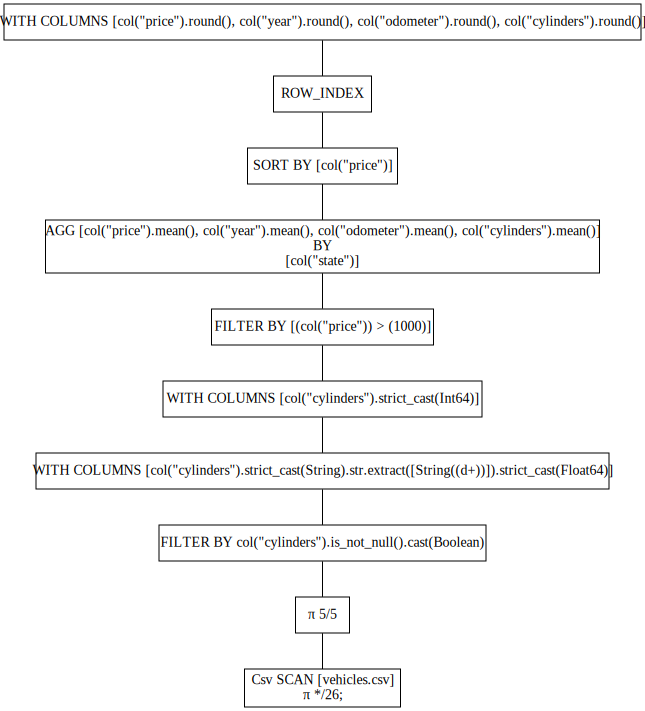

In [ ]:
## DO NOT EDIT
vehicles_aggregated_pl_lf.show_graph(optimized=False)

We can also print the non-optimized plan with explain(optimized=False). The printed plan should also be read from bottom to top.

In [ ]:
## DO NOT EDIT
print(vehicles_aggregated_pl_lf.explain(optimized=False))

 WITH_COLUMNS:
 [col("price").round(), col("year").round(), col("odometer").round(), col("cylinders").round()] 
  ROW_INDEX
    SORT BY [col("price")]
      AGGREGATE
      	[col("price").mean(), col("year").mean(), col("odometer").mean(), col("cylinders").mean()] BY [col("state")] FROM
        FILTER [(col("price")) > (1000)] FROM
           WITH_COLUMNS:
           [col("cylinders").strict_cast(Int64)] 
             WITH_COLUMNS:
             [col("cylinders").strict_cast(String).str.extract([String((\d+))]).strict_cast(Float64)] 
              FILTER col("cylinders").is_not_null().cast(Boolean) FROM
                 SELECT [col("state"), col("price"), col("year"), col("odometer"), col("cylinders")] FROM
                  Csv SCAN [vehicles.csv]
                  PROJECT */26 COLUMNS


Run the below cell to see a graph of the optimzed query plan. Again, the query plan visualization should be read from bottom to top.


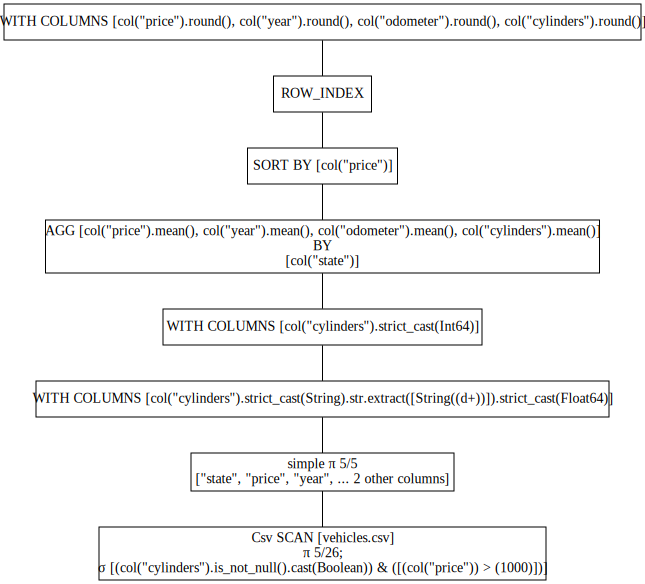

In [ ]:
## DO NOT EDIT
vehicles_aggregated_pl_lf.show_graph()

We can again print the optimized plan with explain().

In [ ]:
## DO NOT EDIT
print(vehicles_aggregated_pl_lf.explain())

 WITH_COLUMNS:
 [col("price").round(), col("year").round(), col("odometer").round(), col("cylinders").round()] 
  ROW_INDEX
    SORT BY [col("price")]
      AGGREGATE
      	[col("price").mean(), col("year").mean(), col("odometer").mean(), col("cylinders").mean()] BY [col("state")] FROM
         WITH_COLUMNS:
         [col("cylinders").strict_cast(Int64)] 
           WITH_COLUMNS:
           [col("cylinders").strict_cast(String).str.extract([String((\d+))]).strict_cast(Float64)] 
            simple π 5/5 ["state", "price", "year", ... 2 other columns]
              Csv SCAN [vehicles.csv]
              PROJECT 5/26 COLUMNS
              SELECTION: [(col("cylinders").is_not_null().cast(Boolean)) & ([(col("price")) > (1000)])]


In this case the query optimizer has identified that the filter can be applied while the CSV is read from disk rather than reading the whole file into memory and then applying the filter. This optimization is called Predicate Pushdown.

Check out other optimizations that the Polars does to a lazy query here: https://docs.pola.rs/user-guide/lazy/optimizations/


# HW Submission

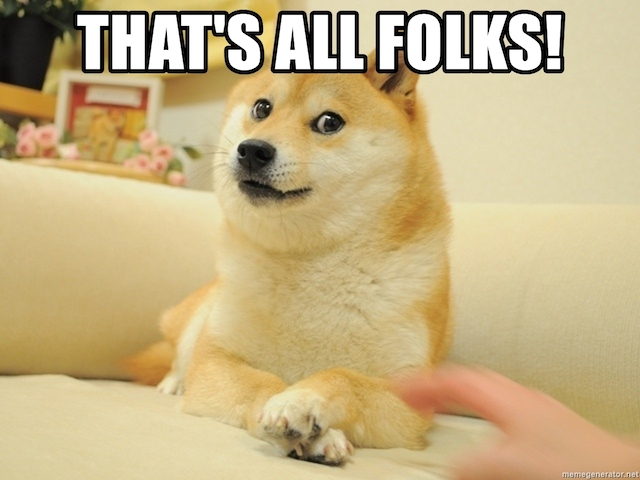

The good news is you basically know the score you already got because of the autograder. In fact, since for the first time the autograder is integrated into Gradescope, you should be able to see your autograder score automatically! We will be manually grading a few points here and there, but your score is mostly certain.

Before you submit on Gradescope (you must submit your notebook to receive credit):


1.   Restart and Run-All to make sure there's nothing wrong with your notebook
2.   **Double check that you have the correct PennID (all numbers) in the autograder**.
3. Make sure you've run all the PennGrader cells
4. Go to the "File" tab at the top left, and download both the .ipynb and .py files, renaming them as "homework1.ipynb" and "homework1.py" respectively. Upload both files to Gradescope directly!

**You MUST check that your notebook displays ALL visualizations on the Gradescope preview AND verify that the autograder finishes running and gives you your expected score (not a 0).**

**Let the course staff know ASAP if you have any issues submitting, but otherwise best of luck! Congrats on finishing the first HW.**